# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Sep 27, 23:59 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Kangni Wang  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1006783562

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? ___
* What are the target classes? ___
* What do these target classes signify?  ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [130]:
### YOUR CODE HERE ###

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [132]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [133]:
# create labels for feature, feature names, target and target names of the dataset
feature_data = dataset.data
target_data = dataset.target
feature_names = dataset.feature_names
target_names = dataset.target_names

In [134]:
# Create DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = target_data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Part1 - Question1

In [135]:
# How many features do we have in this dataset? 
print('number of features is', feature_data.shape[1])
# What are the target classes?
print('target classes are', np.unique(target_data))
# What do these target classes signify?
print('target classes signify', target_names)
# How many participants tested Malignant? 
print('number of participants tested Malignant:', np.sum(target_data == 0))
# How many participants tested Benign?
print('number of participants tested Benign:', np.sum(target_data == 1))

number of features is 30
target classes are [0 1]
target classes signify ['malignant' 'benign']
number of participants tested Malignant: 212
number of participants tested Benign: 357


In [136]:
target_class = np.unique(target_data)
target_class

array([0, 1])

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

**

In [137]:
### YOUR CODE HERE ###

Part1 - Question2

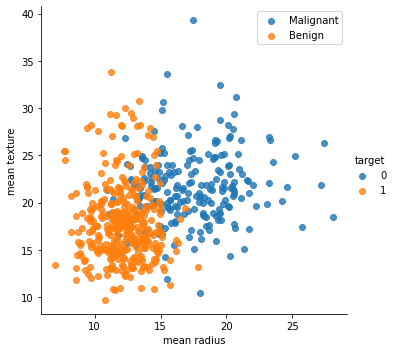

In [138]:
# scatter plot for 'mean radius' and 'mean texture'
sns.lmplot(x = 'mean radius', y = 'mean texture', fit_reg = False, hue = 'target', legend = True, data = df)
plt.legend(labels = ['Malignant', 'Benign'])
plt.show()

By looking at x-axis, we can see that the mean radius for Benign is around 0 to 15, but for Malignant, mean radius is around 15 to 25, which is quite different for the two types. By looking at y-axis, there is not much differences between two categories, they are all distributed among 0 to 35.


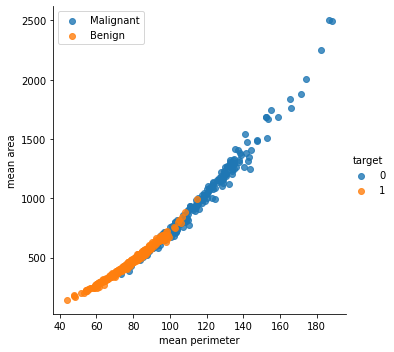

In [139]:
# scatter plot for 'mean perimeter' and 'mean area'
sns.lmplot(x = 'mean perimeter', y = 'mean area', fit_reg = False, hue = 'target', legend = True, data = df)
plt.legend(labels = ['Malignant', 'Benign'])
plt.show()

It looks like there is a linear relationship between two features

Part1 - Question 3: Compare the distribution of 'mean area' and 'mean smoothness' with and without standardization

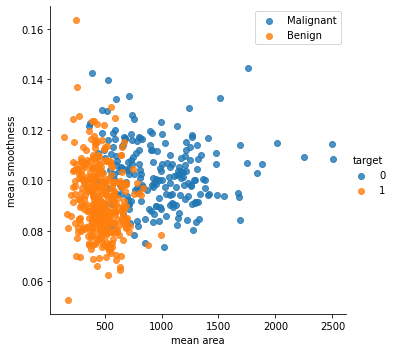

In [140]:
# without standardization
sns.lmplot(x = 'mean area', y = 'mean smoothness', fit_reg = False, hue = 'target', legend = True, data = df)
plt.legend(labels = ['Malignant', 'Benign'])
plt.show()

In [141]:
#with standardization
mu1,si1 = df['mean area'].mean(), df['mean area'].std() 
numerator1 = df['mean area'] - mu1 
mean_area = numerator1/si1
df['mean_area'] = mean_area

In [142]:
mu2,si2 = df['mean smoothness'].mean(), df['mean smoothness'].std() 
numerator2 = df['mean smoothness'] - mu2 
mean_smoothness = numerator2/si2
df['mean_smoothness'] = mean_smoothness

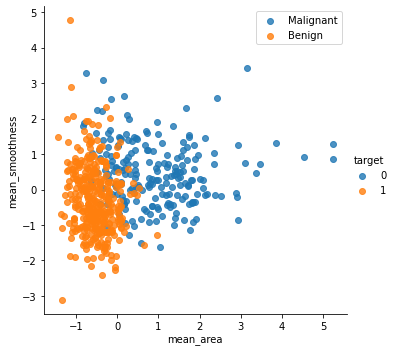

In [143]:
sns.lmplot(x = 'mean_area', y = 'mean_smoothness', fit_reg = False, hue = 'target', legend = True, data = df)
plt.legend(labels = ['Malignant', 'Benign'])
plt.show()

 Explanation: There is no difference regarding to the underlying distribution, it only changes the units of measurement. Standardization will rescale data to a common measure(mean = 0, standard deviation = 1), without distoring differences in the ranges of values. 

Part1 - Question4

In [144]:
X = feature_data
y = target_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]**
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]**



In [145]:
### YOUR CODE HERE ###

Part2-Question1

In [146]:
# train KNN Classifier, loop over different values of k
scores=[]
for k in np.arange(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())
scores

[0.9171202531645569,
 0.9170886075949367,
 0.9272151898734178,
 0.927120253164557,
 0.919620253164557,
 0.9246518987341773,
 0.9321518987341773,
 0.9321518987341773,
 0.9246202531645569,
 0.9346518987341772,
 0.9346518987341772,
 0.9321202531645569,
 0.9221518987341772,
 0.9296835443037976,
 0.9221518987341772,
 0.9246202531645569,
 0.9120569620253164,
 0.9195886075949368,
 0.9120886075949368,
 0.9145886075949367,
 0.9070253164556963,
 0.9095253164556961,
 0.9070569620253165,
 0.9070253164556961,
 0.9045253164556962,
 0.9095569620253163,
 0.9095569620253163,
 0.9095569620253163,
 0.9095569620253163,
 0.9095569620253163,
 0.9045569620253164,
 0.9070569620253165,
 0.9070569620253165,
 0.9095569620253166,
 0.9095569620253166,
 0.9070569620253164,
 0.9070569620253165,
 0.9095569620253166,
 0.9095569620253166,
 0.9095569620253166,
 0.9070569620253165,
 0.9095569620253166,
 0.9095569620253166,
 0.9095569620253166,
 0.9020569620253165,
 0.9070569620253165,
 0.9020253164556962,
 0.909556962025

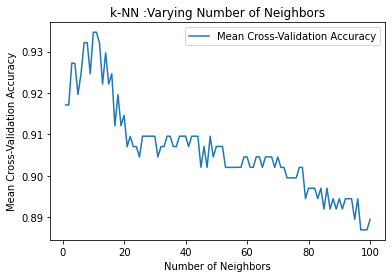

In [147]:
# generate plot
plt.title('k-NN :Varying Number of Neighbors')
plt.plot(np.arange(1,101), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

Part2-Question2

For lower values of k (around (1, 10)), the model is overfitting since it is too 'complex' and fits irrelevant characteristics(noise) in the data, it does not gerneralize the whole data patterns; for higher values k, the model is underfitting since it is too 'simple' to represent all the relevant class characteristics.

In [148]:
print('Best k is:', np.argmax(scores)+1)
print('The maximum accuracy is:', np.max(scores)*100, '%')

Best k is: 10
The maximum accuracy is: 93.46518987341771 %


Part2-Question3: feature selection

In [149]:
#P# feature selection

In [150]:
df_Xtrain = pd.DataFrame(data = X_train, columns = feature_names)
df_ytrain = pd.DataFrame(data = y_train.reshape(-1,1), columns = ['target'])
cols = np.array(df_Xtrain.columns)
knn = KNeighborsClassifier(n_neighbors = 10)
max_acc = 0
while True:
    accs = []
    for i in cols: 
        name = cols[cols!=i]
        df_X = df_Xtrain.loc[:,name]
        acc = cross_val_score(knn, df_X.values, df_ytrain.values.ravel(), cv = 5)
        accs.append(acc.mean())        
    if max_acc <= max(accs):
        idx = np.argmax(accs)
        max_acc = max(accs)
        #print(max_acc)
        cols = np.delete(cols,idx)
    else:
        break
print(cols) # we keep only four features: mean perimeter, mean area, area error, worst area

['mean perimeter' 'mean area' 'area error' 'worst area']


In [151]:
df_Xtrain_fs = df_Xtrain.loc[:, cols].values
df_ytrain_fs = df_ytrain.values.ravel()

scores = []
for k in np.arange(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df_Xtrain_fs, df_ytrain_fs, cv=5)
    scores.append(score.mean())
scores
# The maximum accuracy we can get after feature selection, it is the same as before

[0.9146518987341772,
 0.9170253164556963,
 0.9196518987341772,
 0.9195886075949368,
 0.9170886075949367,
 0.9246518987341773,
 0.9321518987341773,
 0.929620253164557,
 0.9246202531645569,
 0.9346518987341772,
 0.9296518987341772,
 0.9321202531645569,
 0.9221518987341772,
 0.9296518987341772,
 0.9221518987341772,
 0.922120253164557,
 0.9120569620253164,
 0.9195886075949368,
 0.9120886075949368,
 0.9145886075949367,
 0.9070253164556963,
 0.9095569620253166,
 0.9070569620253165,
 0.9045253164556962,
 0.9045253164556962,
 0.9095569620253163,
 0.9070569620253165,
 0.9095569620253163,
 0.9095569620253163,
 0.9095569620253163,
 0.9045569620253164,
 0.9070569620253165,
 0.9070569620253165,
 0.9095569620253166,
 0.9095569620253166,
 0.9070569620253164,
 0.9070569620253165,
 0.9070569620253165,
 0.9070569620253165,
 0.9095569620253166,
 0.9070569620253165,
 0.9095569620253166,
 0.9095569620253166,
 0.9095569620253166,
 0.9020569620253165,
 0.9070569620253165,
 0.9020253164556962,
 0.907056962025

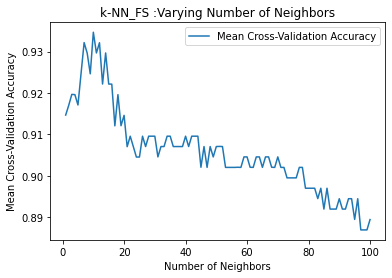

In [152]:
# generate plot
plt.title('k-NN_FS :Varying Number of Neighbors')
plt.plot(np.arange(1,101), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

In [153]:
print('Best k after feature selection is:', np.argmax(scores)+1)
print('The maximum accuracy after feature selection is:', np.max(scores)*100, '%')

Best k after feature selection is: 10
The maximum accuracy after feature selection is: 93.46518987341771 %


The graph after feature selection has the same trend with before (without feature selection). We only keep 4 features in the end, which are 'mean perimeter' 'mean area' 'area error' 'worst area'. If we want to drop one more feature from the four features, accuracy will drop, which means the model will start to underfit. Therefore, we must keep four features to get the same performance as before.

## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**


In [154]:
### YOUR CODE HERE ###

Part3-Question1:

In [155]:
# with standardization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores=[]
for k in np.arange(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    scores.append(score.mean())
scores

[0.9522468354430378,
 0.944746835443038,
 0.9623734177215189,
 0.9623734177215189,
 0.9522784810126582,
 0.9548101265822785,
 0.9649367088607596,
 0.9649367088607596,
 0.9598417721518986,
 0.9674367088607594,
 0.9649050632911391,
 0.9624050632911393,
 0.9599050632911392,
 0.9624050632911393,
 0.9548417721518987,
 0.9523417721518987,
 0.9498417721518987,
 0.9523417721518987,
 0.9473101265822784,
 0.9498101265822785,
 0.9498101265822785,
 0.9523417721518987,
 0.9498417721518987,
 0.9498417721518987,
 0.9523417721518987,
 0.952373417721519,
 0.9422784810126581,
 0.954873417721519,
 0.9473101265822784,
 0.952373417721519,
 0.9422468354430379,
 0.9473101265822784,
 0.9472784810126582,
 0.9473101265822784,
 0.9447784810126582,
 0.9498417721518987,
 0.9472784810126582,
 0.9447784810126582,
 0.944746835443038,
 0.9472784810126582,
 0.9422151898734178,
 0.9422151898734178,
 0.9397151898734176,
 0.9397151898734176,
 0.9397151898734176,
 0.9397151898734176,
 0.9397151898734176,
 0.939715189873417

In [156]:
print('Best k with standardized data is:', np.argmax(scores)+1)
print('The max accuracy with standardized data is:', np.max(scores)*100, '%') 

Best k with standardized data is: 10
The max accuracy with standardized data is: 96.74367088607593 %


In [157]:
X_comb = pd.DataFrame(X_train_scaled, columns=dataset.feature_names)
knn = KNeighborsClassifier(n_neighbors = 10)
cols = X_comb.columns
max_acc = 0
while True:
    accs = []
    for i in cols: 
        name = cols[cols!=i]
        df_X = X_comb.loc[:,name]
        acc = cross_val_score(knn, df_X.values, df_ytrain.values.ravel(), cv = 5)
        accs.append(acc.mean())
    if max_acc <= max(accs):
        idx = np.argmax(accs)
        max_acc = max(accs)
        #print(max_acc)
        cols = np.delete(cols,idx)
    else:
        break
print(cols) # we keep 20 features down below

Index(['mean texture', 'mean perimeter', 'mean smoothness',
       'mean concave points', 'radius error', 'texture error', 'area error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [158]:
df_Xtrain_fs_scaled = X_comb.loc[:, cols].values
df_ytrain_fs_scaled = df_ytrain.values.ravel()
scores=[]
for k in np.arange(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df_Xtrain_fs_scaled, df_ytrain_fs_scaled, cv=5)
    scores.append(score.mean())
scores

[0.9547468354430381,
 0.9497784810126582,
 0.9624050632911393,
 0.9623734177215189,
 0.9623734177215189,
 0.9648734177215189,
 0.9648734177215189,
 0.975,
 0.9598417721518986,
 0.975,
 0.9649050632911391,
 0.9674367088607594,
 0.9674367088607594,
 0.9674367088607594,
 0.959873417721519,
 0.9624050632911393,
 0.957373417721519,
 0.9624367088607595,
 0.954873417721519,
 0.954873417721519,
 0.9523417721518987,
 0.954873417721519,
 0.9498101265822785,
 0.9574050632911393,
 0.954873417721519,
 0.954873417721519,
 0.9472784810126582,
 0.9498101265822785,
 0.9447784810126582,
 0.9523417721518987,
 0.9498417721518987,
 0.9523417721518987,
 0.9498417721518987,
 0.952373417721519,
 0.9472784810126582,
 0.9523417721518987,
 0.9472784810126582,
 0.9472784810126582,
 0.9472468354430379,
 0.9497784810126582,
 0.944746835443038,
 0.9472468354430379,
 0.944746835443038,
 0.9447784810126582,
 0.944746835443038,
 0.944746835443038,
 0.9422468354430379,
 0.9472468354430379,
 0.944746835443038,
 0.9447468

In [159]:
print('Best k with standardized data after feature selection is:', np.argmax(scores)+1)
print('The max accuracy with standardized data after feature selection is:', np.max(scores)*100, '%')

Best k with standardized data after feature selection is: 8
The max accuracy with standardized data after feature selection is: 97.5 %


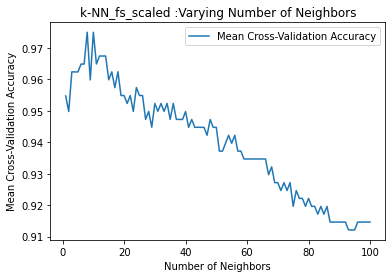

In [160]:
# generate plot
plt.title('k-NN_fs_scaled :Varying Number of Neighbors')
plt.plot(np.arange(1,101), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

Part3-Question2

Yes, standardized data leads to a better performance. The training accuracy without standardization is 96.74%, and it increase to 97.5% after standardization. This is because data has different scale in the breast cancer dataset. For example, 'mean area' range from 0 to 1000 but 'mean smoothness' range from 0 to 1. If we don't standardized our dataset, this will lead to a situation which is a feature ranges from 0 to 1000 will outweigh a feature that ranges from 0 to 1. Standardization will help data equalize the range and prevent this problem. 
  

## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

In [161]:
### YOUR CODE HERE ###

I choose the model which by using standardization data and also after feature selection one, since it has the highest training accuracy 97.5%.

In [162]:
X_comb_test = pd.DataFrame(X_test_scaled, columns = feature_names)
df_Xtest_fs_scaled = X_comb_test.loc[:, cols].values

In [163]:
knn.fit(df_Xtrain_fs_scaled, y_train)
accuracy = accuracy_score(y_test, knn.predict(df_Xtest_fs_scaled))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  94.73684210526315 %


In [164]:
train = []
test = []
for k in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(df_Xtrain_fs_scaled, y_train)
  yhat_train = knn.predict(df_Xtrain_fs_scaled)
  yhat_test = knn.predict(df_Xtest_fs_scaled)
  train.append(accuracy_score(y_train,yhat_train))
  test.append(accuracy_score(y_test,yhat_test))
  

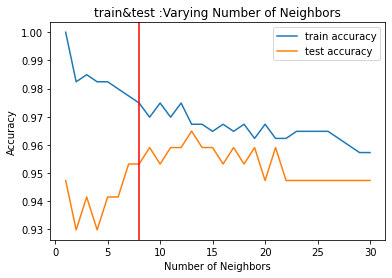

In [165]:
# generate plot
plt.title('train&test :Varying Number of Neighbors')
plt.plot(np.arange(1,31), train, label='train accuracy')
plt.plot(np.arange(1,31), test, label='test accuracy')
plt.axvline(x=8, color='r', linestyle='-')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

I choose the model which by using standardized data and also do feature selection, since it has highest training accuracy 97.5%. From the graph above, the test accuracy is lower than training accuracy, by looking at graph above, we can see that the model is slightly overfitting when k = 8 since the optimal test accuracy is around 12. The model is becoming more 'complex' and it may fit irrelevant characteristics(noise) in the data, it does not gerneralize the whole data patterns. 

## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

Part5-Question1: introduce dataset

In the wine dataset, we have 178 samples, 13 features. For target data, we have three classes, which are class0, class1 and class2.

In [166]:
from sklearn.datasets import load_wine
data = load_wine()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [167]:
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [168]:
# How many features do we have in this dataset? 
print('number of features is', X.shape[1])
# What are the target classes?
print('target classes are', np.unique(y))
# What do these target classes signify?
print('target classes signify', target_names)
# How many wine belongs to class 0? 
print('number of class 0 wine:', np.sum(y == 0))
# How many wine belongs to class 1? 
print('number of class 1 wine:', np.sum(y == 1))
# How many wine belongs to class 2?
print('number of class 2 wine:', np.sum(y == 2))

number of features is 13
target classes are [0 1 2]
target classes signify ['class_0' 'class_1' 'class_2']
number of class 0 wine: 59
number of class 1 wine: 71
number of class 2 wine: 48


Part5 - Question2: Create a KNN classifier using the tools you've learned

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [170]:
scores=[]
for k in np.arange(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())
scores

[0.749,
 0.6943333333333332,
 0.693,
 0.6683333333333332,
 0.6283333333333334,
 0.644,
 0.6443333333333334,
 0.6439999999999999,
 0.6683333333333332,
 0.6523333333333332,
 0.628,
 0.6526666666666666,
 0.6603333333333332,
 0.6849999999999999,
 0.6846666666666666,
 0.661,
 0.6363333333333333,
 0.7016666666666667,
 0.6933333333333332,
 0.694,
 0.694,
 0.7016666666666667,
 0.71,
 0.71,
 0.7016666666666667,
 0.7096666666666667,
 0.7096666666666667,
 0.7096666666666667,
 0.7016666666666667,
 0.7016666666666667,
 0.7016666666666667,
 0.7096666666666667,
 0.7176666666666667,
 0.7096666666666667,
 0.7096666666666667,
 0.7096666666666667,
 0.7096666666666667,
 0.7096666666666667,
 0.7176666666666667,
 0.7096666666666667,
 0.7016666666666667,
 0.7016666666666667,
 0.7016666666666667,
 0.7016666666666667,
 0.7016666666666667,
 0.6936666666666667,
 0.7013333333333333,
 0.6686666666666666,
 0.677,
 0.6526666666666667,
 0.6526666666666667,
 0.6686666666666666,
 0.6933333333333334,
 0.701,
 0.70133333

In [171]:
print('Best k is:', np.argmax(scores)+1)
print('The maximum accuracy is:', np.max(scores)*100, '%')

Best k is: 1
The maximum accuracy is: 74.9 %


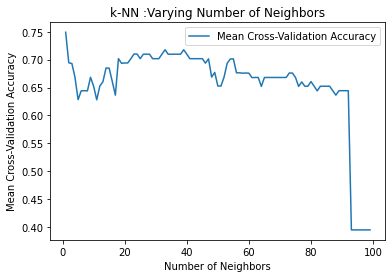

In [172]:
# generate plot

plt.title('k-NN :Varying Number of Neighbors')
plt.plot(np.arange(1,100), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

Test Data Accuracy

In [173]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  75.92592592592592 %


In [174]:
train = []
test = []
for k in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  yhat_train = knn.predict(X_train)
  yhat_test = knn.predict(X_test)
  train.append(accuracy_score(y_train,yhat_train))
  test.append(accuracy_score(y_test,yhat_test))

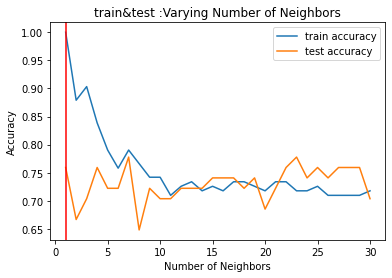

In [175]:
# generate plot
plt.title('train&test :Varying Number of Neighbors')
plt.plot(np.arange(1,31), train, label='train accuracy')
plt.plot(np.arange(1,31), test, label='test accuracy')
plt.axvline(x=1, color='r', linestyle='-')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

From the graph above, we can see that the training accuracy is overfitting when k = 1. The model is becoming more 'complex' and it may fit irrelevant characteristics(noise) in the data, it does not gerneralize the whole data patterns. One possible reason for this is that the wine dataset has too few features, which can not show the actually pattern, we need to collect more data in this situation. 

Just want to try -- Feature selection

In [176]:
X_comb = pd.DataFrame(X_train, columns = feature_names)
knn = KNeighborsClassifier(n_neighbors = 1)
cols = X_comb.columns
max_acc = 0
while True:
    accs = []
    for i in cols: 
        name = cols[cols!=i]
        df_X = X_comb.loc[:,name]
        acc = cross_val_score(knn, df_X.values, y_train, cv = 5)
        accs.append(acc.mean())
    if max_acc <= max(accs):
        idx = np.argmax(accs)
        max_acc = max(accs)
        #print(max_acc)
        cols = np.delete(cols,idx)
    else:
        break
print(cols)

Index(['alcohol', 'malic_acid', 'total_phenols', 'flavanoids',
       'proanthocyanins', 'color_intensity'],
      dtype='object')


In [177]:
X_comb = X_comb.loc[:, cols].values
scores=[]
for k in np.arange(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_comb, y_train, cv=5)
    scores.append(score.mean())
scores

[0.9596666666666666,
 0.9109999999999999,
 0.9349999999999999,
 0.9193333333333333,
 0.9189999999999999,
 0.9189999999999999,
 0.9109999999999999,
 0.9109999999999999,
 0.9109999999999999,
 0.9109999999999999,
 0.9189999999999999,
 0.9109999999999999,
 0.9113333333333333,
 0.9113333333333333,
 0.9196666666666665,
 0.9276666666666665,
 0.9033333333333333,
 0.9199999999999999,
 0.9276666666666665,
 0.9276666666666665,
 0.9196666666666665,
 0.9116666666666665,
 0.9116666666666667,
 0.8956666666666667,
 0.9036666666666667,
 0.9196666666666667,
 0.9036666666666667,
 0.9036666666666667,
 0.8956666666666667,
 0.8953333333333333,
 0.8873333333333333,
 0.9036666666666667,
 0.9036666666666667,
 0.9036666666666667,
 0.8956666666666667,
 0.8873333333333333,
 0.8876666666666667,
 0.8796666666666667,
 0.8876666666666667,
 0.8876666666666667,
 0.8876666666666667,
 0.8716666666666667,
 0.8633333333333333,
 0.8633333333333333,
 0.8633333333333333,
 0.8553333333333335,
 0.8633333333333333,
 0.8473333333

In [178]:
print('Best k after feature selection is:', np.argmax(scores)+1)
print('The maximum accuracy after feature selection is:', np.max(scores)*100, '%')

Best k after feature selection is: 1
The maximum accuracy after feature selection is: 95.96666666666665 %


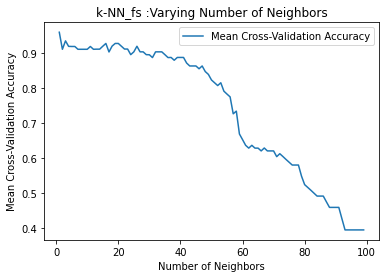

In [179]:
# generate plot
plt.title('k-NN_fs :Varying Number of Neighbors')
plt.plot(np.arange(1,100), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

By doing feature selection, we get a higher training accuracy than before, which means we only keep those features that are important in this model. 

Standardization

In [180]:
# with standardization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores=[]
for k in np.arange(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    scores.append(score.mean())
scores

[0.96,
 0.9359999999999999,
 0.9353333333333333,
 0.9436666666666665,
 0.9673333333333334,
 0.9513333333333334,
 0.9596666666666666,
 0.9516666666666665,
 0.9676666666666666,
 0.9516666666666665,
 0.9676666666666666,
 0.9433333333333334,
 0.9433333333333334,
 0.9433333333333334,
 0.9516666666666665,
 0.9596666666666666,
 0.9676666666666666,
 0.976,
 0.976,
 0.976,
 0.976,
 0.976,
 0.976,
 0.976,
 0.976,
 0.96,
 0.968,
 0.9516666666666665,
 0.976,
 0.968,
 0.976,
 0.976,
 0.976,
 0.9676666666666666,
 0.976,
 0.976,
 0.9676666666666666,
 0.96,
 0.96,
 0.96,
 0.952,
 0.952,
 0.952,
 0.952,
 0.952,
 0.96,
 0.96,
 0.952,
 0.96,
 0.9436666666666665,
 0.9516666666666665,
 0.9436666666666665,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.952,
 0.9359999999999999,
 0.9359999999999999,
 0.9199999999999999,
 0.9039999999999999,
 0.8880000000000001,
 0.8720000000000001,
 0.8560000000000001,
 0.8240000000000001,
 0.808,
 0.7916666666666667,
 0.7670000000000001,
 0.7266666666666668,
 0.686,
 0.6613333333333

In [181]:
print('Best k for standardizd data is:', np.argmax(scores)+1)
print('The maximum accuracy for standardized data is:', np.max(scores)*100, '%')

Best k for standardizd data is: 18
The maximum accuracy for standardized data is: 97.6 %


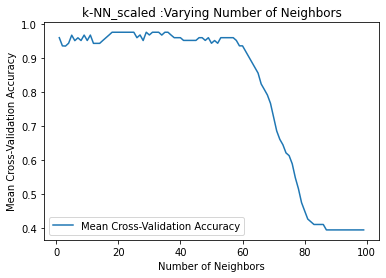

In [182]:
# generate plot

plt.title('k-NN_scaled :Varying Number of Neighbors')
plt.plot(np.arange(1,100), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

Test Data Accuracy

In [183]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_scaled, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  100.0 %


In [184]:
train = []
test = []
for k in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled, y_train)
  yhat_train = knn.predict(X_train_scaled)
  yhat_test = knn.predict(X_test_scaled)
  train.append(accuracy_score(y_train,yhat_train))
  test.append(accuracy_score(y_test,yhat_test))

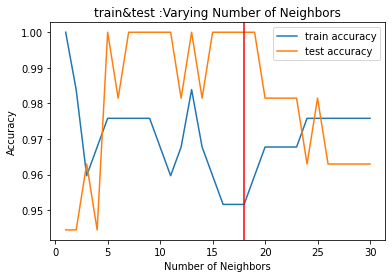

In [185]:
# generate plot
plt.title('train&test :Varying Number of Neighbors')
plt.plot(np.arange(1,31), train, label='train accuracy')
plt.plot(np.arange(1,31), test, label='test accuracy')
plt.axvline(x=18, color='r', linestyle='-')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above graph, we can see that the test set accuracy is 100% which is a very rare situation. We can try by setting test_size = 0.4 or 0.5, or 10-fold validation to see if anything changes. 

Just want to try - feature selection(with standardized data)

In [186]:
X_comb = pd.DataFrame(X_train_scaled, columns = feature_names)
knn = KNeighborsClassifier(n_neighbors = 18)
cols = X_comb.columns
max_acc = 0
while True:
    accs = []
    for i in cols: 
        name = cols[cols!=i]
        df_X = X_comb.loc[:,name]
        acc = cross_val_score(knn, df_X.values, y_train, cv = 5)
        accs.append(acc.mean())
    if max_acc <= max(accs):
        idx = np.argmax(accs)
        max_acc = max(accs)
        #print(max_acc)
        cols = np.delete(cols,idx)
    else:
        break
print(cols)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'flavanoids',
       'nonflavanoid_phenols', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [187]:
X_comb = X_comb.loc[:, cols].values
scores=[]
for k in np.arange(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_comb, y_train, cv=5)
    scores.append(score.mean())
scores

[0.976,
 0.9359999999999999,
 0.976,
 0.9596666666666666,
 0.9756666666666666,
 0.9596666666666666,
 0.992,
 0.968,
 0.9756666666666666,
 0.9676666666666666,
 0.9676666666666666,
 0.9593333333333334,
 0.9676666666666666,
 0.9593333333333334,
 0.9676666666666666,
 0.9676666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9756666666666666,
 0.9676666666666666,
 0.9756666666666666,
 0.9676666666666666,
 0.9676666666666666,
 0.9676666666666666,
 0.9676666666666666,
 0.9676666666666666,
 0.9596666666666666,
 0.9516666666666665,
 0.9596666666666666,
 0.9436666666666665,
 0

In [188]:
print('Best k with standardization data after feature selection is:', np.argmax(scores)+1)
print('The maximum accuracy with standardization data after feature selection is:', np.max(scores)*100, '%')

Best k with standardization data after feature selection is: 7
The maximum accuracy with standardization data after feature selection is: 99.2 %


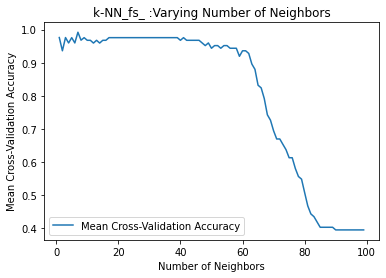

In [189]:
# generate plot
plt.title('k-NN_fs_ :Varying Number of Neighbors')
plt.plot(np.arange(1,100), scores, label = 'Mean Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

By doing feature selection, we drop unimportant features in this model, and we can get a higher training accuracy than before. 
